# Preparação das Bases

In [24]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
import joblib

In [25]:
# Importa Base de Dados
df_ml = pd.read_csv('C:/Users/CB517RL/OneDrive - EY/Desktop/Projeto Academy/churn.csv')
df_ml.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
# Substitui variaveis descritivas
df_ml['id_geography'] = df_ml['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2})
df_ml['id_gender'] = df_ml['Gender'].replace({'Female': 0, 'Male': 1})

In [27]:
# Exclui colunas que nao serao utilizadas no modelo
df_ml = df_ml.drop(columns=["Surname", "RowNumber", "Geography", "Gender"])

### Dicionário de Colunas

- **CustomerId:** Id da pessoa
- **CreditScore:** Score de crédito da pessoa
- **Tenure:** (Pesquisar significado!)
- **Balance:** Valor disponível em conta
- **NumOfProducts:** Número de produtos contratados
- **HasCrCard:** Tem cartão de crédito?
- **IsActiveMember:** É membro ativo?
- **EstimatedSalary:** Estimativa de salário
- **Exited:** Cliente realizou churn?
- **id_geography:** País de localização
  - `0`: França
  - `1`: Espanha
  - `2`: Alemanha
- **id_gender:** Gênero da pessoa
  - `0`: Feminino
  - `1`: Masculino



In [28]:
df_ml.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,id_geography,id_gender
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# Analise de correlacao entre as colunas

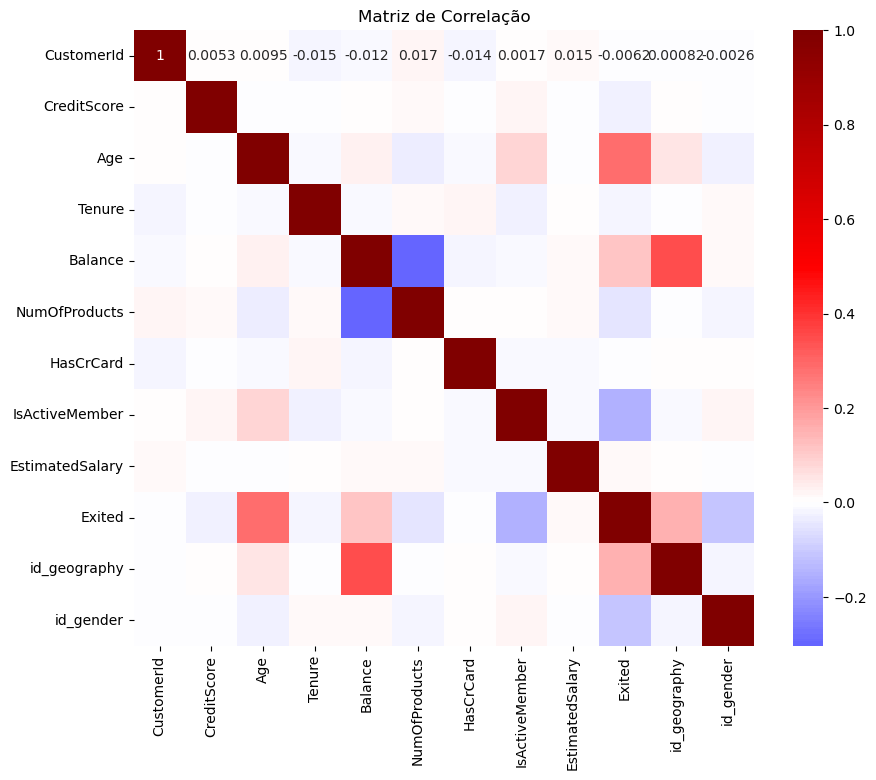

In [6]:
# Análise da correlação entre as colunas
correlation_matrix = df_ml.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', center=0)
plt.title("Matriz de Correlação")
plt.show()

# Construção dos Modelos

### Definição da variáveis de treino e de teste

In [29]:
# definindo a aleatoriedade para separação das bases de treino e de teste
SEED = 5
np.random.seed(SEED)

In [30]:
# Separa os dados em features e target
x = df_ml[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "id_geography", "id_gender"]] # Features
y = df_ml["Exited"] # Target variable

Base possue grande desproporcionalidade entre os valores de churn positivo e churn negativo, por isso o balanceamento é necessário.

In [31]:
# Usa SMOTE() para balancear a divisao entre número de churn positivos e de negativos
treino_x, treino_y = SMOTE().fit_resample(x, y)

In [32]:
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())
 
print("\nContagem de classes após o balanceamento:")
print(treino_y.value_counts())

Contagem de classes antes do balanceamento:
Exited
0    7963
1    2037
Name: count, dtype: int64

Contagem de classes após o balanceamento:
Exited
1    7963
0    7963
Name: count, dtype: int64


In [33]:
# Divide de variaveis de treino e de teste (features e target)
treino_x, teste_x, treino_y, teste_y = train_test_split(treino_x, 
                                                        treino_y, 
                                                        random_state=SEED, 
                                                        test_size=0.3)

In [34]:
# Escala as duas variáveis
scaler = MinMaxScaler(feature_range=(0, 1))
treino_x = scaler.fit_transform(treino_x)
teste_x = scaler.fit_transform(teste_x)

### SVC

In [13]:
# Modelo SVC
svc = SVC()
svc.fit(treino_x, treino_y)
previsoes_svc = svc.predict(teste_x)

In [14]:
# Acuracia SVC
acuracia = accuracy_score(teste_y, previsoes_svc) * 100
print("A acurácia foi de: %.2f%%" % acuracia)

A acurácia foi de: 81.60%


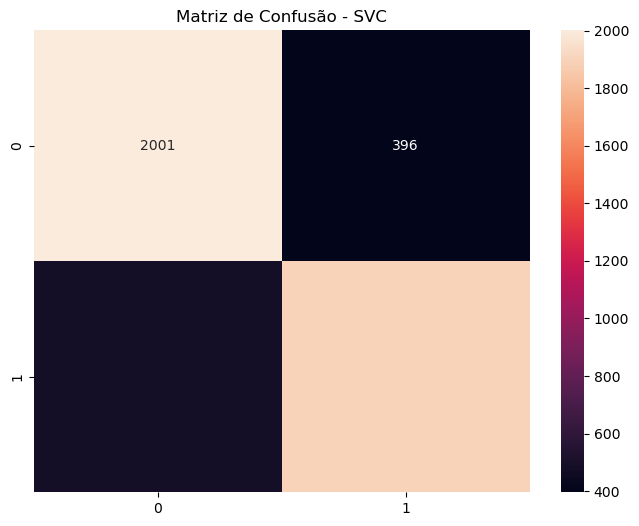

In [15]:
# Matriz de confusao SVC
y_true_svc = teste_y
y_pred_svc = previsoes_svc
matriz_de_confusao_svc = confusion_matrix(y_true_svc, y_pred_svc) 
 
plt.figure(figsize=(8, 6))
 
sns.heatmap(matriz_de_confusao_svc, annot=True, fmt='d')
 
plt.title('Matriz de Confusão - SVC')
plt.show()

In [16]:
matriz_de_confusao_svc

array([[2001,  396],
       [ 483, 1898]], dtype=int64)

In [37]:
# Recall SVC
recall_svc = recall_score(y_true_svc, y_pred_svc, average=None)
print(recall_svc)

[0.83479349 0.79714406]


### KNN (K Neighbors Classifier)

In [17]:
# Modelo KNN
knn = KNeighborsClassifier()
knn.fit(treino_x, treino_y)
previsoes_knn = knn.predict(teste_x)

In [18]:
# Acuracia KNN
acuracia_knn = accuracy_score(teste_y, previsoes_knn) * 100
print("A acurácia foi de: %.2f%%" % acuracia_knn)

A acurácia foi de: 79.41%


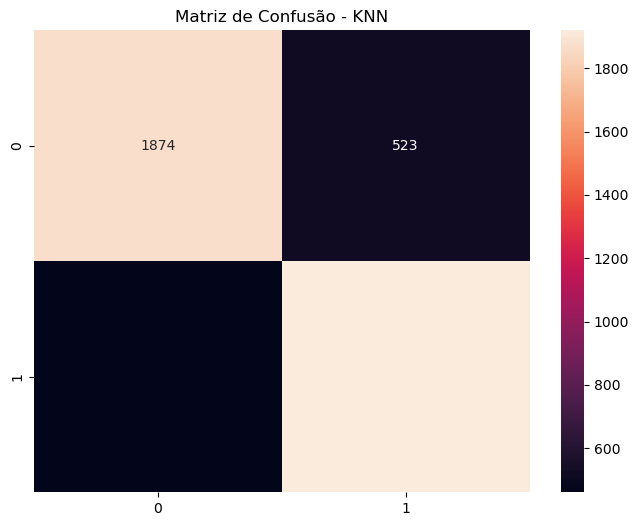

In [19]:
# Matriz de confusao KNN
y_true_knn = teste_y
y_pred_knn = previsoes_knn
matriz_de_confusao_knn = confusion_matrix(y_true_knn, y_pred_knn) 
 
plt.figure(figsize=(8, 6))
 
sns.heatmap(matriz_de_confusao_knn, annot=True, fmt='d')
 
plt.title('Matriz de Confusão - KNN')
plt.show()

In [20]:
matriz_de_confusao_knn

array([[1874,  523],
       [ 461, 1920]], dtype=int64)

In [21]:
# Recall KNN
recall_knn = recall_score(y_true_knn, y_pred_knn, average=None)
print(recall_knn)

[0.7818106  0.80638387]


### Arvore de decisao

In [14]:
# Modelo Decision Tree
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(treino_x, treino_y)
previsoes_decisionTree = decisionTree.predict(teste_x)

In [15]:
# Acuracia Decision Tree
acuracia_tree = accuracy_score(teste_y, previsoes_decisionTree) * 100
print("A acurácia foi de: %.2f%%" % acuracia_tree)

A acurácia foi de: 75.97%


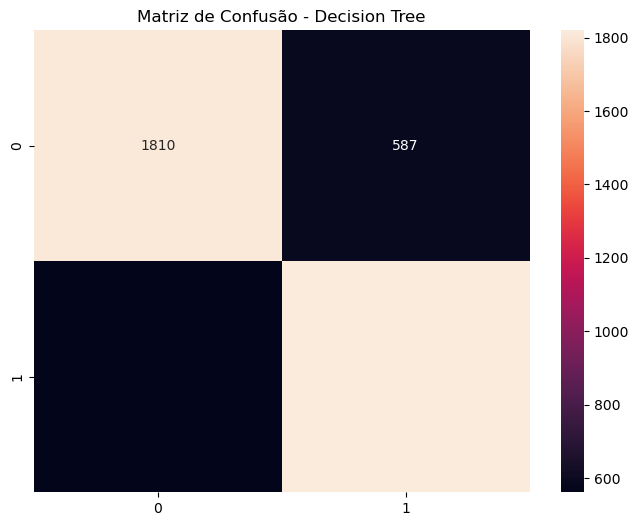

In [16]:
# Matriz de confusao Decision Tree
y_true_tree = teste_y
y_pred_tree = previsoes_decisionTree
matriz_de_confusao_tree = confusion_matrix(y_true_tree, y_pred_tree) 
 
plt.figure(figsize=(8, 6))
 
sns.heatmap(matriz_de_confusao_tree, annot=True, fmt='d')
 
plt.title('Matriz de Confusão - Decision Tree')
plt.show()

In [17]:
matriz_de_confusao_tree

array([[1810,  587],
       [ 561, 1820]], dtype=int64)

In [18]:
# Recall Decision Tree
recall_tree = recall_score(teste_y, previsoes_decisionTree) * 100
print("A taxa de Recall foi de: %.2f%%" % recall_tree)

A taxa de Recall foi de: 76.44%


In [19]:
# Arvore de decisao
fig, ax = plt.subplots()

tree.plot_tree(decisionTree)

plt.plot()

[]

Error in callback <function _draw_all_if_interactive at 0x000001A1706D02C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A173BF6700> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### XGBOOST

In [35]:
# Modelo XGBOOST
xgboost = GradientBoostingClassifier(n_estimators=100, 
                                    learning_rate=1.0, 
                                    max_depth=1, 
                                    random_state=0)
xgboost.fit(treino_x, treino_y)
previsoes_xgboost = xgboost.predict(teste_x)

In [36]:
# Acuracia xgboost
acuracia_xgboost = accuracy_score(teste_y, previsoes_xgboost) * 100
print("A acurácia foi de: %.2f%%" % acuracia_xgboost)

A acurácia foi de: 81.50%


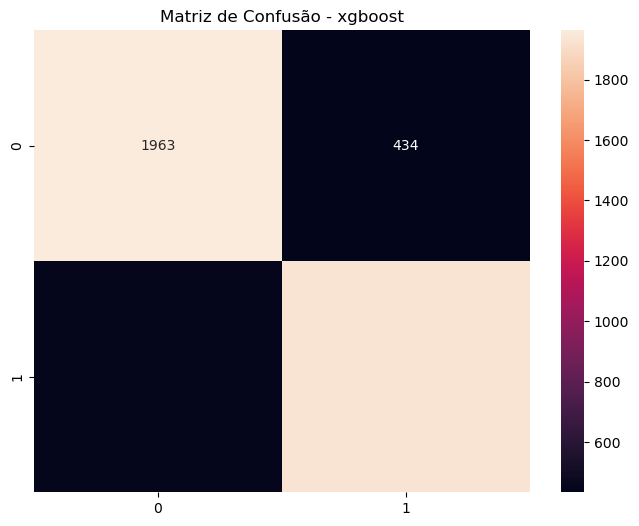

In [37]:
# Matriz de confusao XGBOOST
y_true_xgboost = teste_y
y_pred_xgboost = previsoes_xgboost
matriz_de_confusao_xgboost = confusion_matrix(y_true_xgboost, y_pred_xgboost) 
 
plt.figure(figsize=(8, 6))
 
sns.heatmap(matriz_de_confusao_xgboost, annot=True, fmt='d')
 
plt.title('Matriz de Confusão - xgboost')
plt.show()

In [38]:
matriz_de_confusao_xgboost

array([[1963,  434],
       [ 450, 1931]], dtype=int64)

In [39]:
# Recall XGBOOST
recall_xgboost = recall_score(y_true_xgboost, y_pred_xgboost, average=None)
print(recall_xgboost)

[0.81894034 0.81100378]


# Exportando bases geradas pelos modelos

In [40]:
# Salvar modelo treinado
joblib.dump(xgboost, 'xgboost_model.pkl') 

# Carregar modelo treinado (quando necessário)
xgboost_loaded = joblib.load('xgboost_model.pkl')

UnpicklingError: invalid load key, '\x02'.